<h1 align=center style="line-height:300%;font-family:times new roman;color:#0099cc">
<font face="times new roman" color="#0099cc">
Data Mining Practice 1.1
</font>
</h1>



<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
خواندن کتابخانه ها
</h3>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
دریافت مجموعه داده
</h3>
</div>

In [3]:
df = pd.read_excel('D:\\Arvand\\roohi\\github\\P1\\worldcities.xlsx') 

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
حذف و تغییر نام ستون ها
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ستون‌های
<code>id</code>،
<code>‌capital</code>،
<code>ville_ascii</code>
و
<code>admin_nom</code>
 را از دیتافریم حذف می‌کنیم.
سپس نام ستون‌های
<code>ville</code>
و
<code>pays</code>
 که به زبان فرانسوی نامگذاری شده‌اند را به ترتیب به
<code>city</code>
و
<code>country</code>
تغییر می‌دهیم.
</font>
</p>
</div>

In [4]:
df = df.drop(columns={'ville_ascii', 'capital', 'id', 'admin_nom'})
df = df.rename(columns={'ville':'city', 'pays':'country'})

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
فیلتر کردن داده ها
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
شهر‌های با جمعیت اکیدا کمتر از ۱ میلیون نفر  را از دیتافریم حذف کرده و سپس نوع داده‌های ستون
<code>population</code>
 را از
 <code>float</code>
  به
  <code>int32</code>
   تبدیل می‌کنیم.
</p>
</div>



In [4]:
df = df[df['population']>1000000]

In [5]:
df['population']=df['population'].astype('int32')

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
کار با داده های تکراری و گم شده
</h3>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
نخست ردیف‌های تکراری دیتافریم و سپس ردیف‌هایی که بیش از یک مورد (۲ مورد و بیش‌تر) از اطلاعات آن‌ها گم‌شده است را از دیتافریم حذف می‌کنیم.
</p>
</div>



In [6]:
df = df.drop_duplicates()
df = df.dropna(thresh=df.shape[1] - 1)

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
پر کردن داده های گم‌شده
</h3>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
برای مقادیر گم شده در ستون های
<code>lat</code>
و
<code>lng</code>
،
میانگین همان ستون را در
<ins><strong>همان کشور</strong></ins>
پر می‌کنیم
</p>
</div>



In [8]:
df.describe()
# lat mean = 26.321101
# lng mean = 61.951479

,lat,lng,population
count,762.000000,763.000000,7.640000e+02
mean,26.321101,61.951479,3.498668e+06
std,17.562340,72.223166,4.055736e+06
min,-37.814200,-123.100000,1.001205e+06
25%,21.655950,24.332800,1.335319e+06
50%,30.390250,103.802900,2.150186e+06
75%,36.795825,115.793900,3.929376e+06
max,60.170800,174.740000,3.773200e+07


In [7]:
df['lat'].fillna(df['lat'].mean(), inplace=True)
df['lng'].fillna(df['lng'].mean(), inplace=True)

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
محاسبه فاصله
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می‌خواهیم فاصله هر یک از شهر‌ها را از تهران حساب کنیم. برای این کار از فرمول هاورسین استفاده خواهیم کرد. این فرمول بر اساس طول جغرافیایی (Logitude) و عرض جغرافیایی (Latitude)  دو نقطه در سطح یک کره، فاصله آنها را حساب می‌کند.
فرمول محاسبه فاصله هاورسین در ادامه آورده شده است.
در اینجا ما اول با توجه به فرمول هاورسین و مقادیر طول و عرض جغرافیایی تهران که از دیتافریم استخراج می‌کنیم تابعی می‌نویسیم که فاصله هر شهر را از تهران محاسبه کند و سپس با استفاده از آن تابع ستون جدیدی در دیتافریم ایجاد می‌کنیم که فاصله هر شهر از تهران را داشته باشد
</font>
</p>

</div>



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
فرمول هاورسین:
</font>
</p>



$\lambda_1$, $\lambda_2$ : longitudes of the two points in radians (lng)

$\varphi_1$, $\varphi_2$ : the latitudes of the two points in radians (lat)

$d$ : distance between two cities


$$
r = 6371
$$
$$
a = \sin^2\left(\frac{\varphi_2-\varphi_1}{2}\right) + \cos(\varphi_1)\cos(\varphi_2)\sin^2\left(\frac{\lambda_2-\lambda_1}{2}\right)
$$
$$
d = 2r \operatorname{atan2}\left(\sqrt{a}, \sqrt{1 -a}\right)
$$

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>تذکر:</code>
دقت کنید که مقادیر طول و عرض جغرافیایی ثبت شده در دیتافریم به درجه می‌باشد و برای استفاده از رابطه فوق باید به رادیان تبدیل کنیم. 
</font>
</p>

In [8]:
import math

lat_teh = math.radians(df[df['city'] == 'Tehran']['lat'])
lng_teh = math.radians(df[df['city'] == 'Tehran']['lng'])
r = 6371
def tehran_distance(lat_dest, lng_dest):

    # Haversine formula
    dlat = lat_dest - lat_teh
    dlng = lng_dest - lng_teh
    a = math.sin(dlat/2)**2 + math.cos(lat_teh) * math.cos(lat_dest) * math.sin(dlng/2)**2
    d = 2 * r * math.atan2(math.sqrt(a), math.sqrt(1-a))

    return d

In [9]:
# add a new column in DataFrame

for i in df.index:
  lat_dest = math.radians(df.at[i, 'lat'])
  lng_dest = math.radians(df.at[i, 'lng'])
  df.at[i, 'teh_dist'] = tehran_distance(lat_dest, lng_dest)

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
مرتب سازی
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
شهرها را بر اساس حروف الفبا به صورت صعودی مرتب و سپس بر اساس مقدار ستون
<code>
lat
</code>
به صورت نزولی مرتب می‌کنیم
</font>
</p>

</div>



In [10]:
# Sorting
df = df.sort_values(by=['city', 'lat'], ascending=[True, False])

In [11]:
df

,city,lat,lng,country,iso2,iso3,population,teh_dist
19,Aba,5.1167,7.3667,Nigeria,NG,NGA,1530000,5634.737243
83,Abidjan,5.3167,-4.0333,Côte d'Ivoire,CI,CIV,4980000,6575.533770
121,Abu Dhabi,24.4667,54.3667,United Arab Emirates,AE,ARE,1483000,1280.150009
131,Abuja,9.0667,7.4833,Nigeria,NG,NGA,3770000,5331.673578
169,Accra,5.5500,-0.2000,Ghana,GH,GHA,2388000,6230.918394
...,...,...,...,...,...,...,...,...
41227,Ürümqi,43.8225,87.6125,China,CN,CHN,4335017,3197.472953
385,Āgra,27.1800,78.0200,India,IN,IND,1585704,2687.466060
17397,İzmir,38.4200,27.1400,Turkey,TR,TUR,4320519,2166.791444
28638,Ōsaka,34.6939,135.5022,Japan,JP,JPN,15126000,7381.949949


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
ذخیره سازی
</h3>





In [ ]:
# Save CSV file
df.to_csv('output.csv', index=False)

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
مصور سازی
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت فاصله 10 شهری که کمترین فاصله را از تهران دارند را در قالب یک bar chart نمایش داده‌ایم.
</font>
<br>
نمودار خروجی :
<code> plot_1.png </code>
</p>

</div>



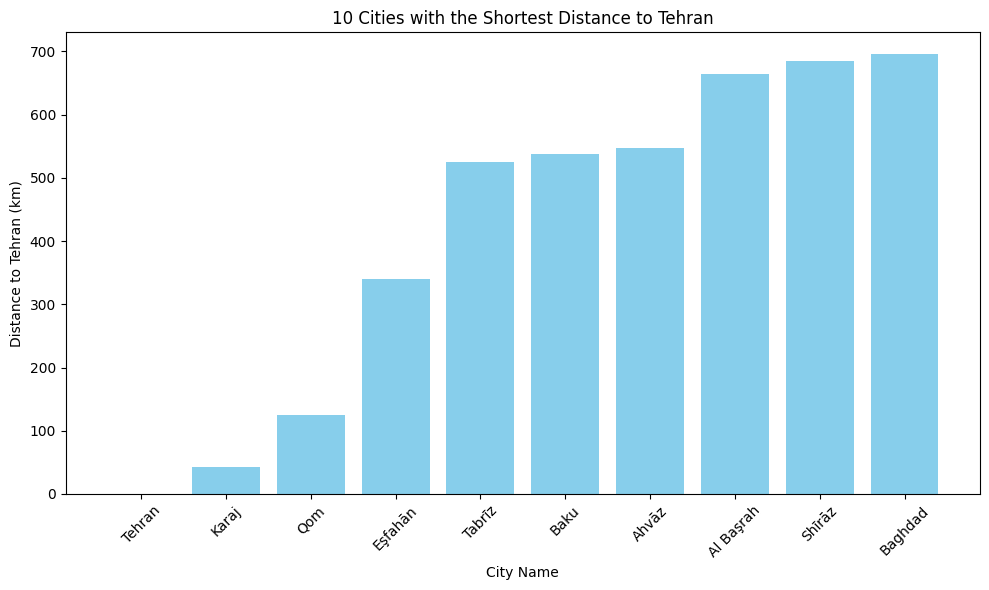

In [13]:
# 10 Nearest Cities to Tehran
top_cities = df.nsmallest(10, 'teh_dist')

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_cities['city'], top_cities['teh_dist'], color='skyblue')
plt.title('10 Cities with the Shortest Distance to Tehran')
plt.ylabel('Distance to Tehran (km)')
plt.xlabel('City Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plot_1.png')


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در قسمت بعدی می‌خواهیم جمعیت 10 شهری که کمترین فاصله را با تهران دارند را رسم نماییم.
<br>
نمودار خروجی:
<code> plot_2.png </code>
</font>
</p>

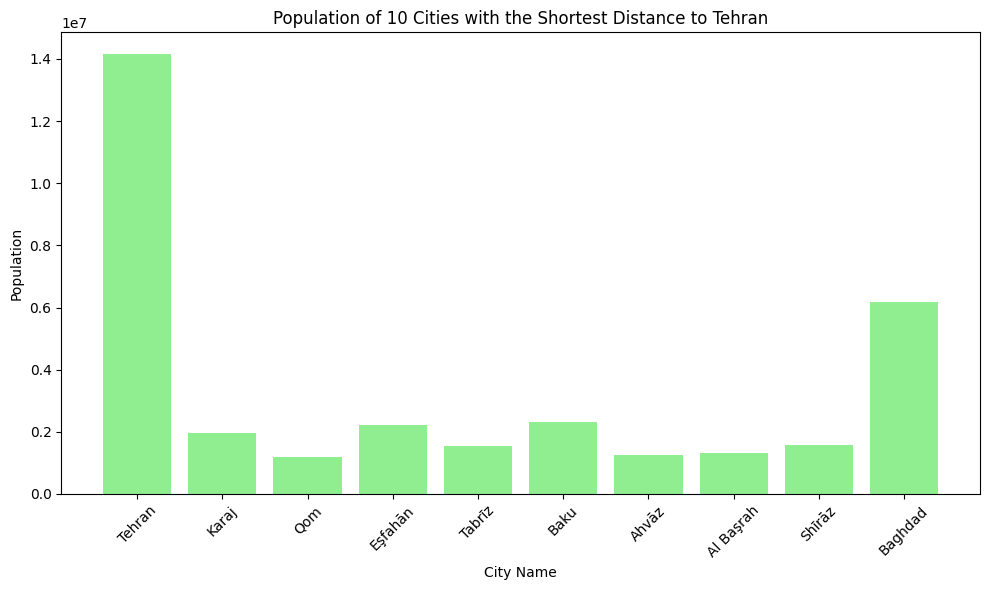

In [14]:
# Population of the 10 Nearest Cities to Tehran

plt.figure(figsize=(10, 6))
plt.bar(top_cities['city'], top_cities['population'], color='lightgreen')
plt.title('Population of 10 Cities with the Shortest Distance to Tehran')
plt.ylabel('Population')
plt.xlabel('City Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plot_2.png')

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در قسمت آخر میخواهیم نمودار Scatter ای رسم کنیم که محور افقی آن Longtitude و محور عمودی آن Latitude باشد.
</font>
خروجی نهایی این نمودار با توجه به حجم بالای دیتاست بسیار جالب است.

<br>
نمودار خروجی:
<code> plot_3.png </code>
</p>

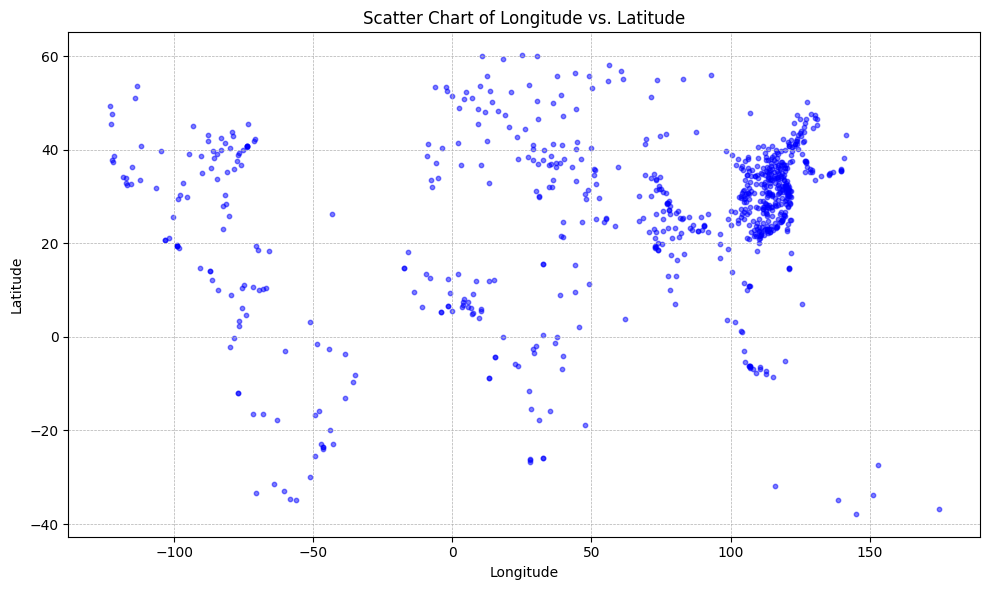

In [20]:
# City Latitudes and Longitudes
plt.figure(figsize=(10, 6))
plt.scatter(df['lng'], df['lat'], c='blue', alpha=0.5, s=10)
plt.title('Scatter Chart of Longitude vs. Latitude')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('plot_3.png')
